# Model - Decision Trees


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("data/loan_data_clean.csv")

In [3]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.0,RENT,24000.0,33
1,0,2400,10.99,C,25.0,RENT,12252.0,31
2,0,10000,13.49,C,13.0,RENT,49200.0,24
3,0,5000,10.99,A,3.0,RENT,36000.0,39
4,0,3000,10.99,E,9.0,RENT,48000.0,24


## Exercise - Build a tree based model on 3 variables

Use the three variables - `age`, `interest`, and `amount`

In [4]:
data = df.loc[:,('age', 'income', 'interest')]
target = df.loc[:,'default']

### Step 1: Create a Decision Tree

In [5]:
from sklearn import tree

In [6]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [7]:
clf = clf.fit(data, target)

### Step 2: Visualise the Decison Tree (depth = 10)

In [8]:
import pydotplus 
from IPython.display import Image

In [9]:
dot_data = tree.export_graphviz(clf, out_file='tree_3.dot', feature_names=data.columns,
                                class_names=['no', 'yes'], filled=True, 
                                rounded=True, special_characters=True)

In [10]:
graph = pydotplus.graph_from_dot_file('tree_3.dot')  

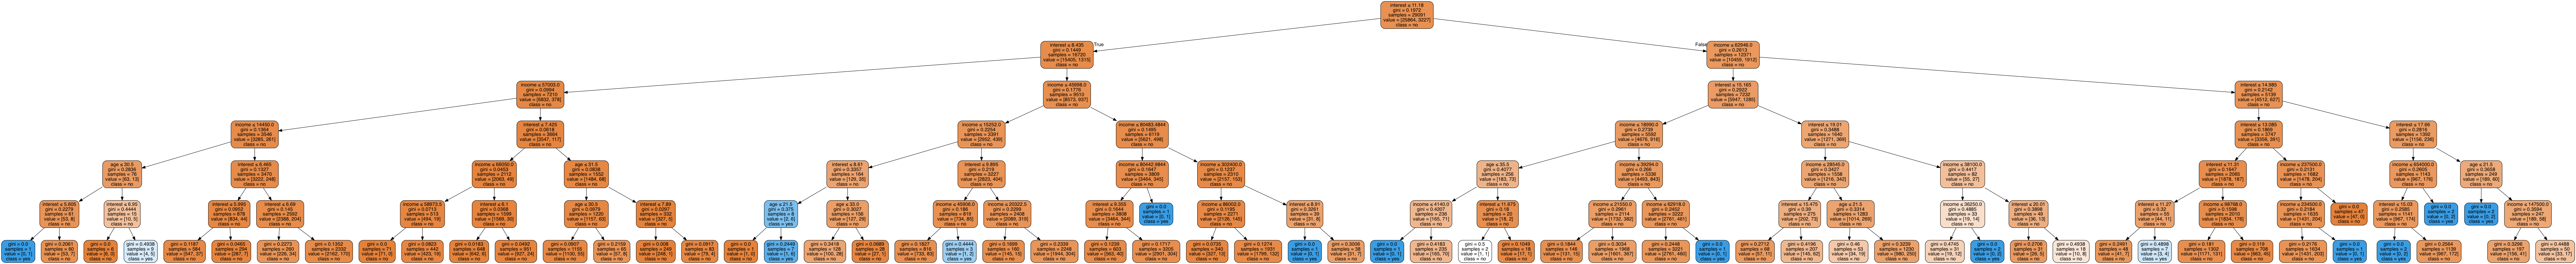

In [11]:
Image(graph.create_png()) 

### Step 3: Visualise the Decision Boundaries - Pairwise

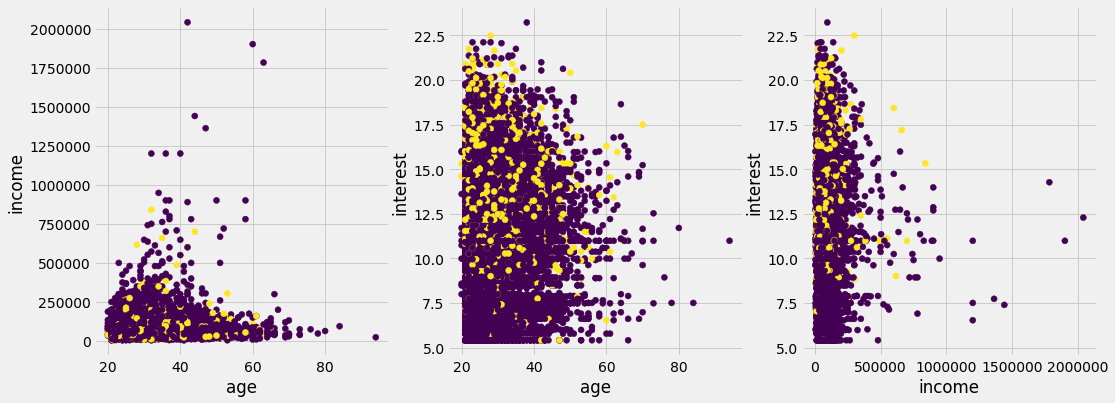

In [12]:
plt.figure(figsize=(16, 6))
for idx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
    X = data.iloc[:, pair]
    y = target
    
    plt.subplot(1, 3, idx + 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap = plt.cm.viridis)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.axis("tight")

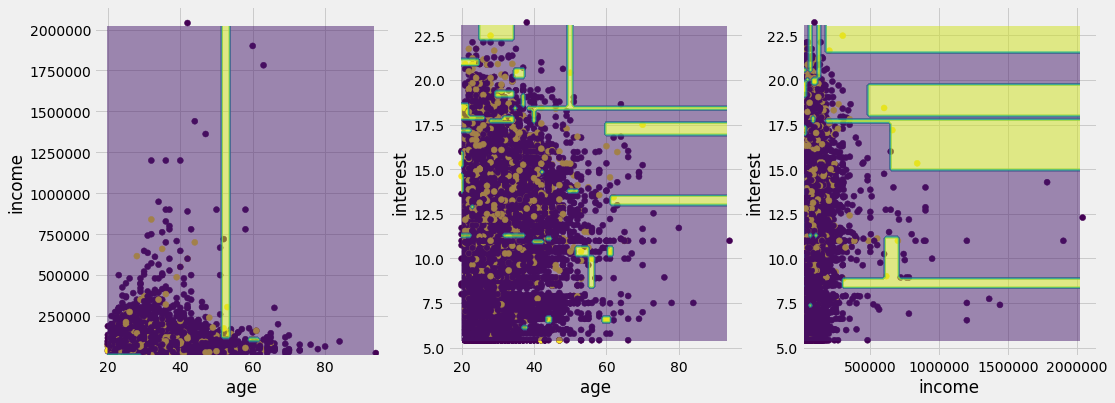

In [13]:
plt.figure(figsize=(16, 6))
for idx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
    X = data.iloc[:, pair]
    y = target
    
    plt.subplot(1, 3, idx + 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap = plt.cm.viridis)

    # Classify the points
    clf2 = tree.DecisionTreeClassifier(max_depth = 10).fit(X, y)
    x_min, x_max = X.ix[:, 0].min(), X.ix[:, 0].max()
    y_min, y_max = X.ix[:, 1].min(), X.ix[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100),
                         np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the mesh                     
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.5)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.axis("tight")

### Step 4: Visualise the Decision Boundaries - All three Variables

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
plt.style.use('seaborn-notebook')

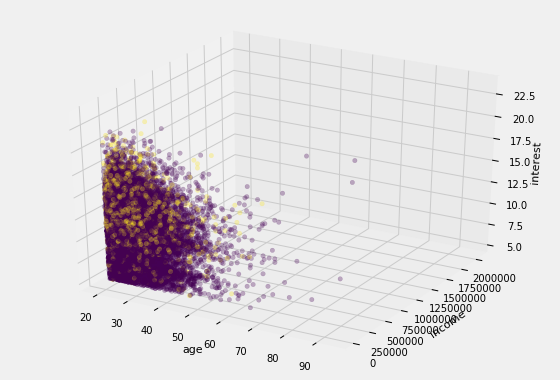

In [16]:
X = data
y = target

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap = plt.cm.viridis, alpha = 0.3)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])
plt.tight_layout()

In [17]:
# Classify the points
clf3 = tree.DecisionTreeClassifier(max_depth = 10).fit(X, y)
x_min, x_max = X.ix[:, 0].min(), X.ix[:, 0].max()
y_min, y_max = X.ix[:, 1].min(), X.ix[:, 1].max()
z_min, z_max = X.ix[:, 2].min(), X.ix[:, 2].max()
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/25),
                     np.arange(y_min, y_max, (y_max - y_min)/25),
                     np.arange(z_min, z_max, (z_max - z_min)/25))
C = clf3.predict(np.c_[xx.ravel(), yy.ravel(), yy.ravel()])
C = C.reshape(xx.shape)

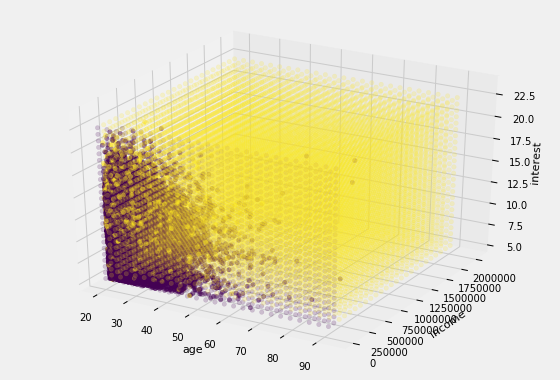

In [18]:
# plot the mesh and points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap = plt.cm.viridis, alpha = 0.5)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])

ax.scatter(xx, yy, zz, c=C, cmap = plt.cm.viridis, alpha = 0.2)
plt.tight_layout()

In [19]:
import matplotlib.animation as animation
from IPython.display import HTML

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap = plt.cm.viridis, alpha = 0.5)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])

ax.scatter(xx, yy, zz, c=C, cmap = plt.cm.viridis, alpha = 0.2)
plt.tight_layout()

# Animate by changing azimuth and elevation
azim = [i for i in range(0,360,36)]
elev = [i for i in range(0,360,36)]
def rotate(num, elev, azim):
    ax.view_init(elev=elev[num], azim=azim[num])

# Creating the Animation object
anim = animation.FuncAnimation(fig, rotate, 10, fargs=(elev, azim),
                                   interval=2000, blit=False)
plt.close(fig)

HTML(anim.to_html5_video())